In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [3]:
import yfinance as yf

tsla = yf.Ticker("TSLA")

In [4]:
tesla_data = tsla.history(period="max")

TSLA: No data found for this date range, symbol may be delisted


In [5]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [6]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

In [7]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

In [8]:
import pandas as pd

# Using Beautiful Soup
table = soup.find('table')
rows = table.find_all('tr')
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    if len(cols) == 2:
        data.append(cols)
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Using read_html function
tables = pd.read_html(html_data)
tesla_revenue = tables[0]
tesla_revenue.columns = ['Date', 'Revenue']

/var/folders/cl/wbfw5l6x06qggs_8v4x0__th0000gn/T/ipykernel_57804/3229970900.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


In [9]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [10]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [11]:
tesla_revenue.head(5)

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


In [12]:
gme = yf.Ticker("GME")

In [13]:
gme_data=gme.history(period="max")

GME: No data found for this date range, symbol may be delisted


In [14]:
gme_data.reset_index(inplace=True)
print(gme_data.head())


Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [15]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text

In [16]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

In [17]:
import pandas as pd

# Using Beautiful Soup
table = soup.find_all('table')[1]
rows = table.find_all('tr')
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    if len(cols) == 2:
        cols[1] = cols[1].replace(',', '').replace('$', '')
        data.append(cols)
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Using read_html function
tables = pd.read_html(html_data)
gme_revenue = tables[1]
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')


/var/folders/cl/wbfw5l6x06qggs_8v4x0__th0000gn/T/ipykernel_57804/3647887353.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


In [18]:
gme_revenue.head(5)

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


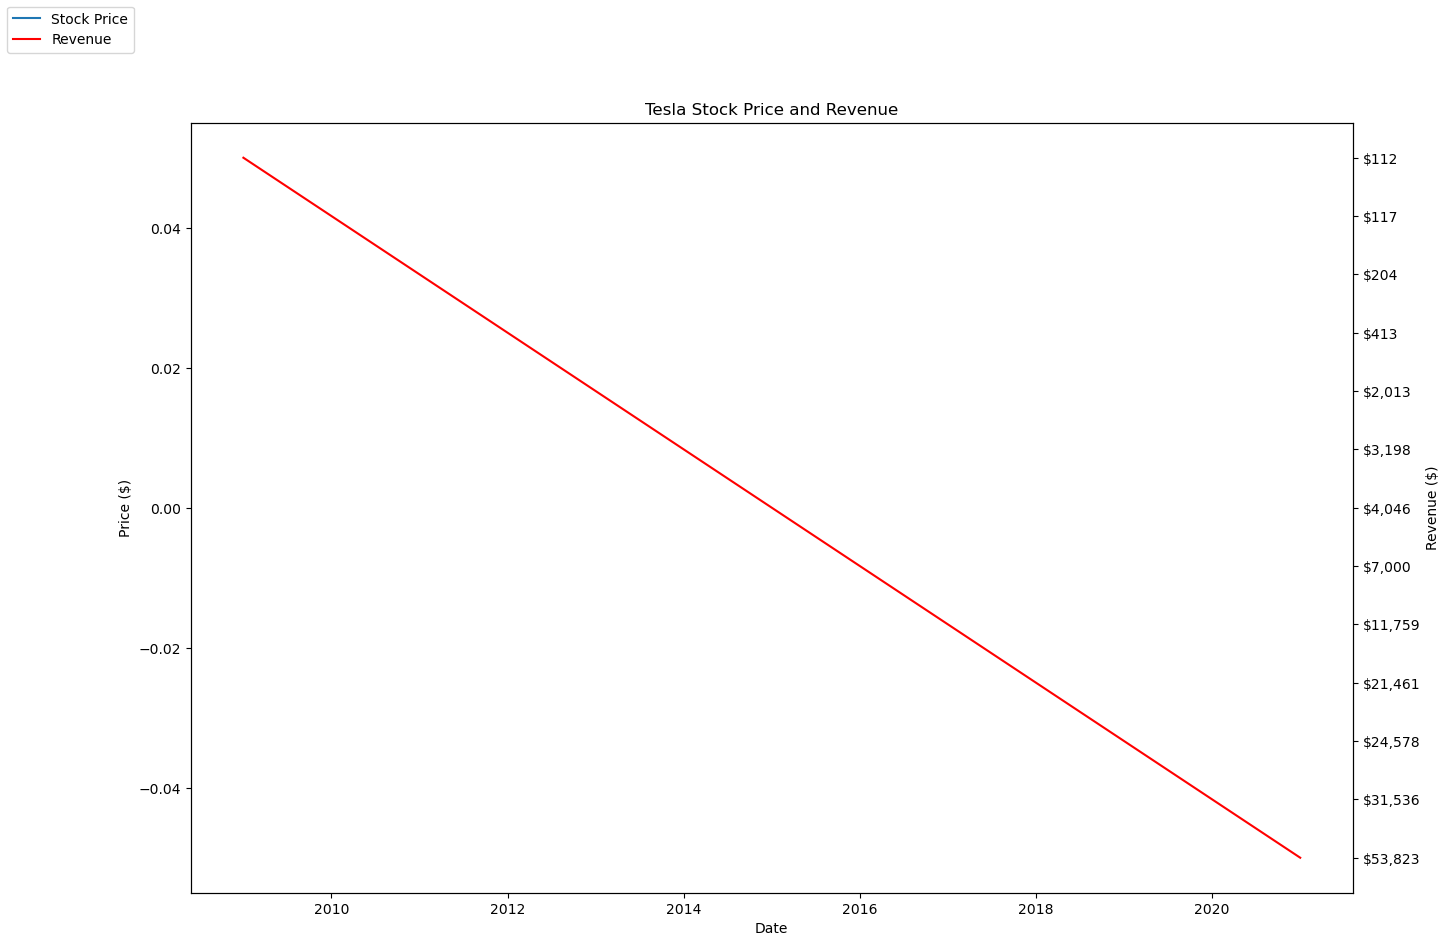

In [19]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    ax2 = ax.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='r', label='Revenue')
    ax2.set_ylabel('Revenue ($)')
    ax.set_title(f'{stock_name} Stock Price and Revenue')
    fig.legend(loc="upper left")
    plt.show()

make_graph(tesla_data[tesla_data['Date'] < '2021-07-01'], tesla_revenue, 'Tesla')


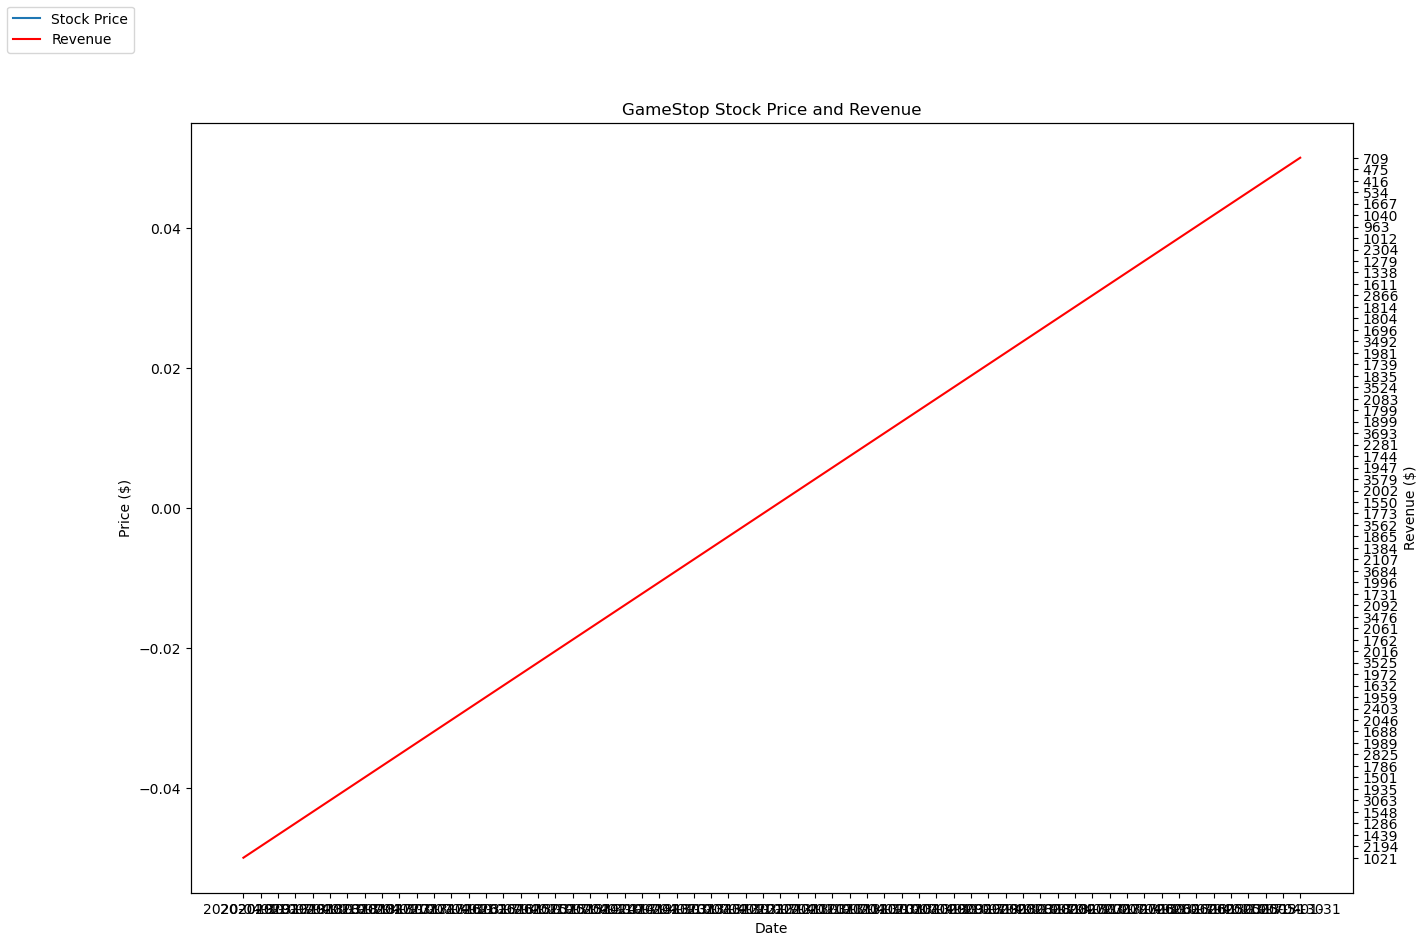

In [20]:
make_graph(gme_data[gme_data['Date'] < '2021-07-01'], gme_revenue, 'GameStop')